## Actualización GitHub

git add .
git commit -m "Actualizo documentación"
git push


## Importación de librerías necesarias

In [22]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelos
from sklearn.preprocessing import (
    LabelEncoder, OrdinalEncoder, OneHotEncoder,
    MinMaxScaler, StandardScaler, PowerTransformer
)
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import (
    mean_absolute_error, r2_score,
    accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier

# Visualizaciones por defecto
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 200)



##  1. CARGA DEL DATASET + REVISIÓN INICIAL

In [23]:
ruta= "C:/Users/lamas/Documents/Ejercicios/Prácticas/bmw_pricing_v3 (1).csv"

In [24]:
df_bmw= pd.read_csv(ruta)

In [25]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [26]:
df_bmw.tail()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01
4842,BMW,525,195840.0,160.0,NaN,diesel,grey,NaN,True,NaN,False,NaN,True,False,True,True,15500.0,2018-09-01


In [27]:
df_bmw.shape

(4843, 18)

In [28]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [29]:
df_bmw.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4841.0,140959.347862,60208.534313,-64.0,102884.0,141080.0,175217.0,1000376.0
potencia,4842.0,128.981826,38.994839,0.0,100.0,120.0,135.0,423.0
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0


In [30]:
df_bmw.duplicated().sum()

np.int64(0)

In [31]:
# Mostrar duplicados (completos)
df_bmw[df_bmw.duplicated(keep=False)].sort_values(by=list(df_bmw.columns)).head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


## Pregunta 1

In [32]:
#Detección de nulos
(df_bmw.isnull().sum()/len(df_bmw))*100

marca                          20.028908
modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
precio                          0.123890
fecha_venta                     0.020648
dtype: float64

En este caso, observamos que la columna "asientos_traseros_plegables" tiene un porcentaje altísimo de nulos (70%), al igual que la "fecha_registro" que tiene un 50% de valores nulos. Vamos a eliminar ambas generando una nueva variable agrupe las variables con un porcentaje de nulos mayor al 50%. Además, la columna capacidad_deposito cuenta con 100% de valores nulos.

In [33]:
cols = df_bmw.columns[df_bmw.isnull().mean() > 0.5]
cols

Index(['fecha_registro', 'asientos_traseros_plegables'], dtype='object')

In [34]:
#Eliminamos
df_bmw.drop(columns=cols, inplace=True)

In [35]:
del(df_bmw["capacidad_deposito"])

KeyError: 'capacidad_deposito'

In [ ]:
#Revisar valores incoherentes
df_bmw.loc[df_bmw["tipo_gasolina"] == "Eléctrico", "capacidad_deposito"] = 0

## Pregunta 2

In [ ]:
(df_bmw.isnull().sum()/len(df_bmw))*100

marca                    20.028908
modelo                    0.061945
km                        0.041297
potencia                  0.020648
tipo_gasolina             0.103242
color                     9.188520
tipo_coche               30.146603
volante_regulable         0.082593
aire_acondicionado       10.035102
camara_trasera            0.041297
elevalunas_electrico      0.041297
bluetooth                15.032005
gps                       0.000000
alerta_lim_velocidad     15.032005
precio                    0.123890
fecha_venta               0.020648
capacidad_deposito      100.000000
dtype: float64

In [ ]:
#Eliminar nulos del target. En el caso del precio, al tener un porcentaje bajo de nulos, se opta por eliminar las filas con nulos en esta columna
df_bmw.dropna(subset=["precio"], inplace=True)

In [ ]:
# Fecha_registro, tiene un impotante numero de nulos, pero no es relevante para el análisis, se elimina
df_bmw.drop(columns=["fecha_registro"], inplace=True)

KeyError: "['fecha_registro'] not found in axis"

In [36]:
#tipo_coche tiene nulos, pero es relevante, se imputa con la moda
df_bmw["tipo_coche"].fillna(df_bmw["tipo_coche"].mode()[0], inplace=True)

C:\Users\lamas\AppData\Local\Temp\ipykernel_26648\2635441399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw["tipo_coche"].fillna(df_bmw["tipo_coche"].mode()[0], inplace=True)


In [37]:
#marca tiene nulos, pero es relevante, se imputa con la moda
df_bmw["marca"].fillna(df_bmw["marca"].mode()[0], inplace=True)

C:\Users\lamas\AppData\Local\Temp\ipykernel_26648\4179509765.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw["marca"].fillna(df_bmw["marca"].mode()[0], inplace=True)


In [38]:
#bluetooth tiene nulos, se imputa con la moda
df_bmw["bluetooth"].fillna(df_bmw["bluetooth"].mode()[0], inplace=True)

C:\Users\lamas\AppData\Local\Temp\ipykernel_26648\3700691327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw["bluetooth"].fillna(df_bmw["bluetooth"].mode()[0], inplace=True)
C:\Users\lamas\AppData\Local\Temp\ipykernel_26648\3700691327.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["blueto

In [39]:
#alerta_lim_velocidad  tiene nulos, se imputa con la moda  
df_bmw["alerta_lim_velocidad"].fillna(df_bmw["alerta_lim_velocidad"].mode()[0], inplace=True)

C:\Users\lamas\AppData\Local\Temp\ipykernel_26648\3321055561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw["alerta_lim_velocidad"].fillna(df_bmw["alerta_lim_velocidad"].mode()[0], inplace=True)
C:\Users\lamas\AppData\Local\Temp\ipykernel_26648\3321055561.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [40]:
#aire_acondicionado tiene nulos, se imputa con la moda
df_bmw["aire_acondicionado"].fillna(df_bmw["aire_acondicionado"].mode()[0], inplace=True)

C:\Users\lamas\AppData\Local\Temp\ipykernel_26648\264863650.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw["aire_acondicionado"].fillna(df_bmw["aire_acondicionado"].mode()[0], inplace=True)
C:\Users\lamas\AppData\Local\Temp\ipykernel_26648\264863650.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [41]:
#color tiene nulos, se imputa con la moda
df_bmw["color"].fillna(df_bmw["color"].mode()[0], inplace=True)

C:\Users\lamas\AppData\Local\Temp\ipykernel_26648\1586239464.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw["color"].fillna(df_bmw["color"].mode()[0], inplace=True)


In [42]:
df_bmw.isnull().sum()

marca                   0
modelo                  3
km                      2
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

In [43]:
#eliminamos los nulos restantes
df_bmw.dropna(inplace=True)

In [44]:
df_bmw.isnull().sum()

marca                   0
modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
dtype: int64

In [45]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   marca                 4817 non-null   object 
 1   modelo                4817 non-null   object 
 2   km                    4817 non-null   float64
 3   potencia              4817 non-null   float64
 4   tipo_gasolina         4817 non-null   object 
 5   color                 4817 non-null   object 
 6   tipo_coche            4817 non-null   object 
 7   volante_regulable     4817 non-null   object 
 8   aire_acondicionado    4817 non-null   bool   
 9   camara_trasera        4817 non-null   object 
 10  elevalunas_electrico  4817 non-null   object 
 11  bluetooth             4817 non-null   bool   
 12  gps                   4817 non-null   bool   
 13  alerta_lim_velocidad  4817 non-null   bool   
 14  precio                4817 non-null   float64
 15  fecha_venta           4817

## Pregunta 3

In [46]:
# Bucle para detectar cada uno de los tipos de variables
def identificador_tipos(df, target=[]):
    numericas = []
    booleanas = []
    categoricas = []
    for col in df.columns:
        kind = df[col].dtype.kind
        if col in target:
            continue
        if kind in ('i','f'):
            unique = df[col].nunique(dropna=False)
            if unique == 2:
                booleanas.append(col)
            else:
                numericas.append(col)
        else:
            categoricas.append(col)
    return numericas, booleanas, categoricas

num_cols, bool_cols, cat_cols = identificador_tipos(df_bmw, target=['precio'] if 'precio' in df_bmw.columns else [])
print("Num:", num_cols)
print("Bool:", bool_cols)
print("Cat:", cat_cols)



Num: ['km', 'potencia']
Bool: []
Cat: ['marca', 'modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad', 'fecha_venta']


### Análisis variables categóricas

In [47]:
#Analisis de las variables categoricas
df_bmw.describe(include="object").T

,count,unique,top,freq
marca,4817,1,BMW,4817
modelo,4817,76,320,747
tipo_gasolina,4817,5,diesel,4610
color,4817,10,black,1931
tipo_coche,4817,8,estate,2546
volante_regulable,4817,2,True,2651
camara_trasera,4817,2,False,3847
elevalunas_electrico,4817,2,False,2598
fecha_venta,4817,13,2018-05-01,808


In [48]:
#Análisis de la variable "tipo_gasolina"
df_bmw["tipo_gasolina"].value_counts(normalize=True)*100

tipo_gasolina
diesel           95.702720
petrol            3.965124
hybrid_petrol     0.166078
Diesel            0.103799
electro           0.062279
Name: proportion, dtype: float64

In [49]:
#Unificar categorias de "tipo_gasolina"
df_bmw["tipo_gasolina"] = df_bmw["tipo_gasolina"].replace({"Diesel": "diesel"})

In [50]:
#Subistituir  "hybrid_petrol" y "electro" por "other"
df_bmw["tipo_gasolina"] = df_bmw["tipo_gasolina"].replace({"hybrid_petrol": "other", "electro": "other"})

In [52]:
df_bmw["tipo_gasolina"].value_counts(normalize=True)*100

tipo_gasolina
diesel    95.806519
petrol     3.965124
other      0.228358
Name: proportion, dtype: float64

In [53]:
df_bmw["color"].value_counts(normalize=True)*100

color
black     40.087191
grey      22.150716
blue      13.348557
white      9.964708
brown      6.269462
silver     6.020345
red        0.975711
beige      0.768113
green      0.290637
orange     0.124559
Name: proportion, dtype: float64

In [54]:
df_bmw["modelo"].value_counts(normalize=True)*100

modelo
320                  15.507577
520                  13.078680
318                  11.667013
X3                    9.072037
116                   7.432012
X1                    5.688188
316                   4.837035
X5                    4.795516
525                   3.778285
530                   3.259290
118                   2.968653
318 Gran Turismo      2.013701
320 Gran Turismo      1.515466
518                   1.370147
X4                    0.954951
535                   0.934191
X6                    0.913432
420                   0.871912
120                   0.747353
330                   0.685074
420 Gran Coupé        0.685074
730                   0.685074
520 Gran Turismo      0.477476
640 Gran Coupé        0.394436
325                   0.394436
530 Gran Turismo      0.373677
740                   0.373677
X5 M                  0.352917
114                   0.311397
218 Active Tourer     0.269878
M550                  0.249118
218                   0.249118
2

In [55]:
df_bmw["tipo_coche"].value_counts(normalize=True)*100

tipo_coche
estate         52.854474
sedan          17.043803
suv            15.652896
hatchback      10.130787
subcompact      1.598505
coupe           1.515466
convertible     0.622794
van             0.581275
Name: proportion, dtype: float64

### Análisis variables numéricas

In [56]:
#Analisis variables numericas
df_bmw.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4817.0,140935.261574,60242.684349,-64.0,102758.0,140991.0,175235.0,1000376.0
potencia,4817.0,128.984845,39.004876,0.0,100.0,120.0,135.0,423.0
precio,4817.0,15841.831015,9223.064638,100.0,10900.0,14200.0,18600.0,178500.0


In [57]:
#Análisis variable "km"
df_bmw[df_bmw["km"]<0]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,BMW,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,2018-04-01


In [58]:
#eliminar valores negativos de "km"
df_bmw= df_bmw[df_bmw["km"]>=0]

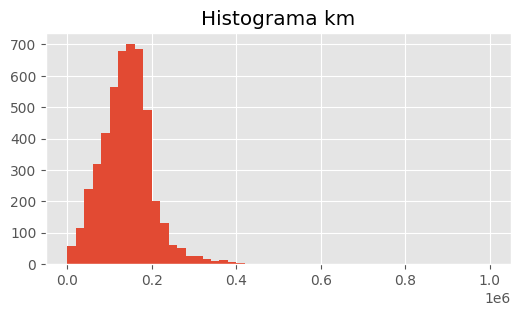

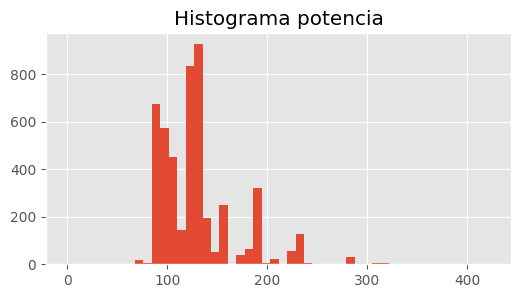

In [59]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    plt.hist(df_bmw[col].dropna(), bins=50)
    plt.title(f'Histograma {col}')
    plt.show()



In [60]:
#Suavizar valor del precio con el logaritmo
df_bmw["precio_log"] = np.log1p(df_bmw["precio"])

C:\Users\lamas\AppData\Local\Temp\ipykernel_26648\2804172343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["precio_log"] = np.log1p(df_bmw["precio"])


<Axes: >

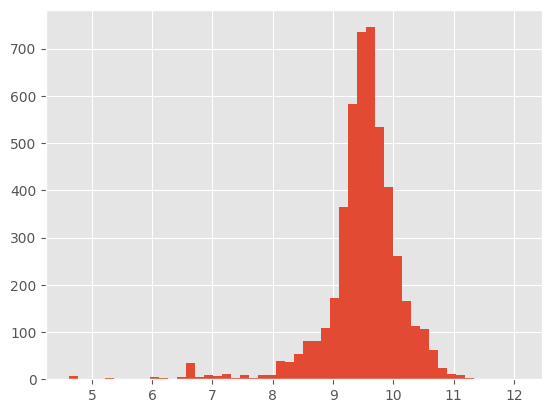

In [61]:
df_bmw.precio_log.hist(bins=50)

## Pregunta 4

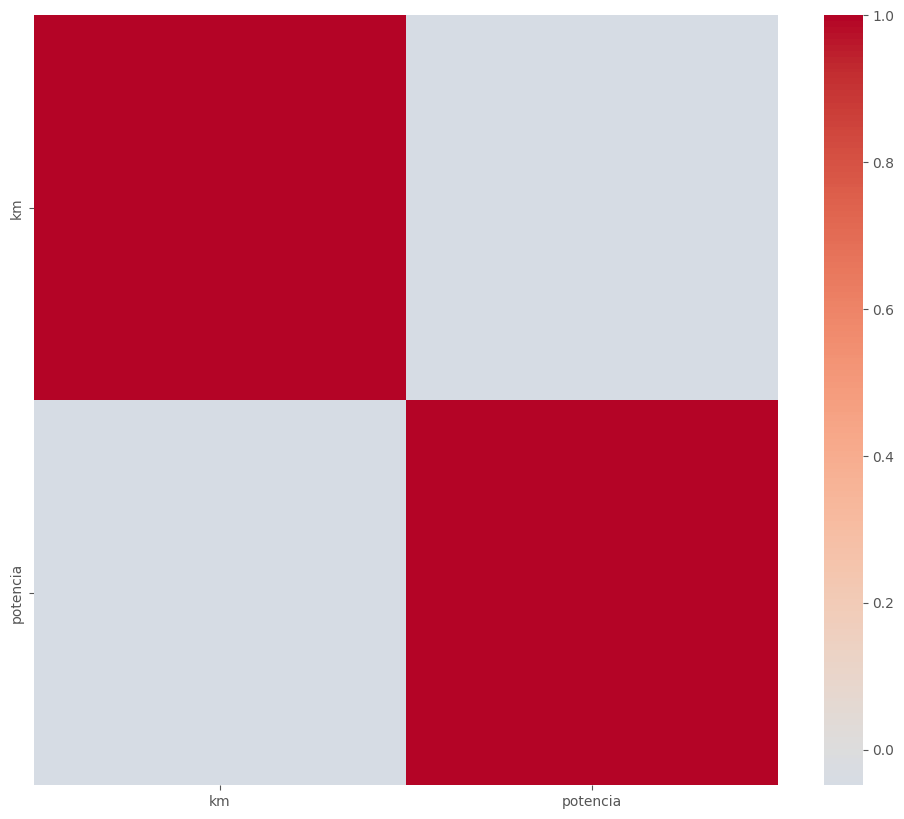

In [62]:
# Análisis correlación entre variables numéricas
corr = df_bmw[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

## Pregunta 5

## Variables categóricas vs target

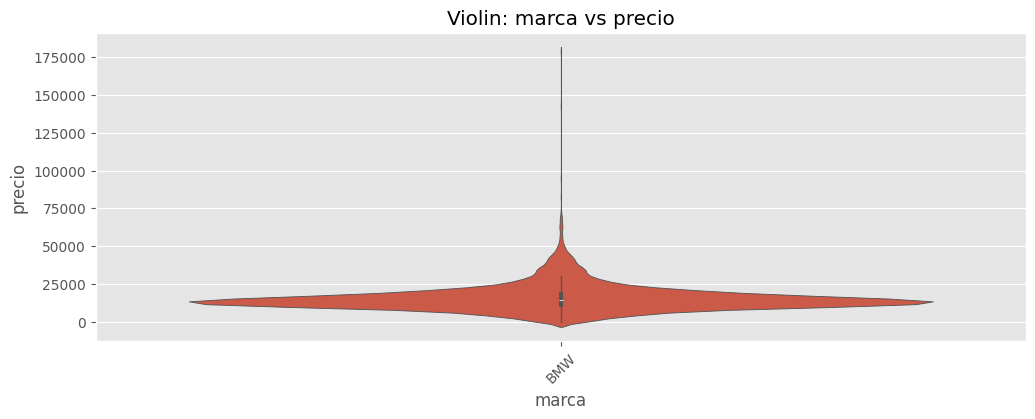

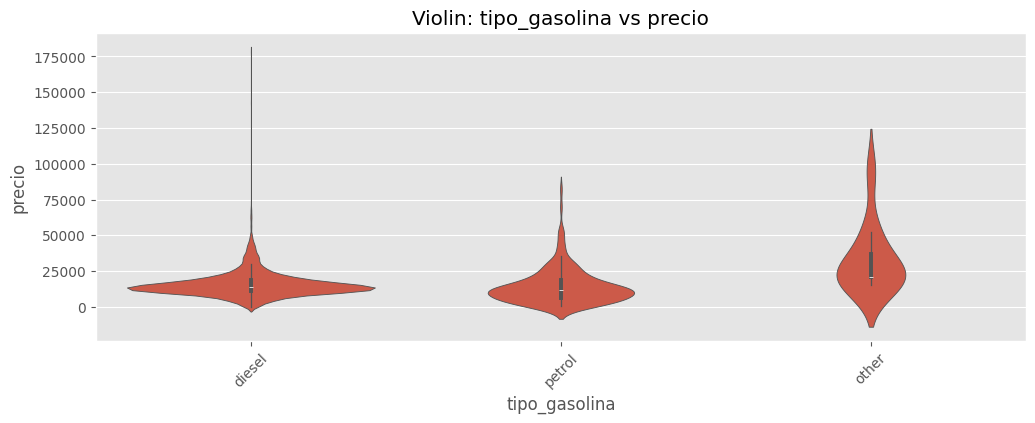

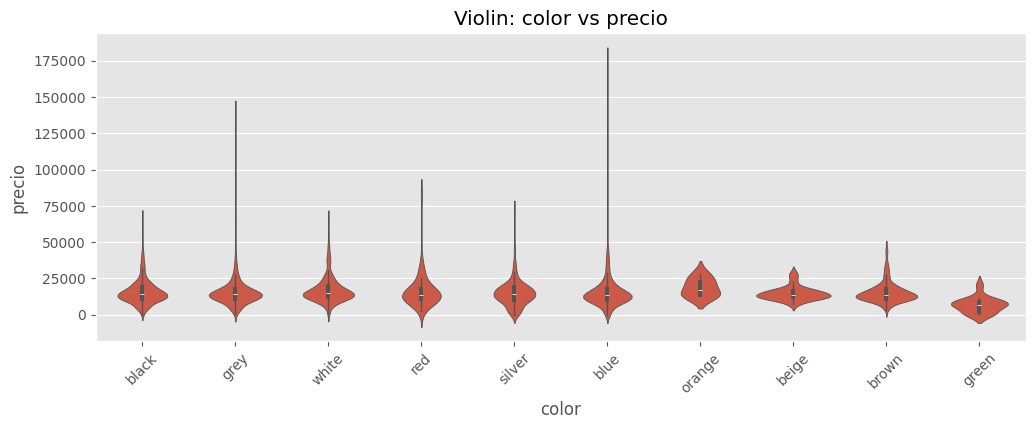

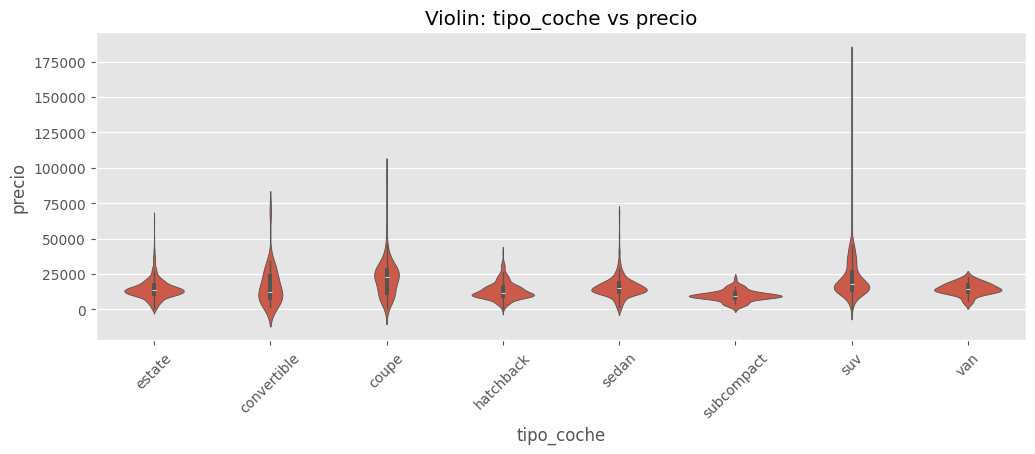

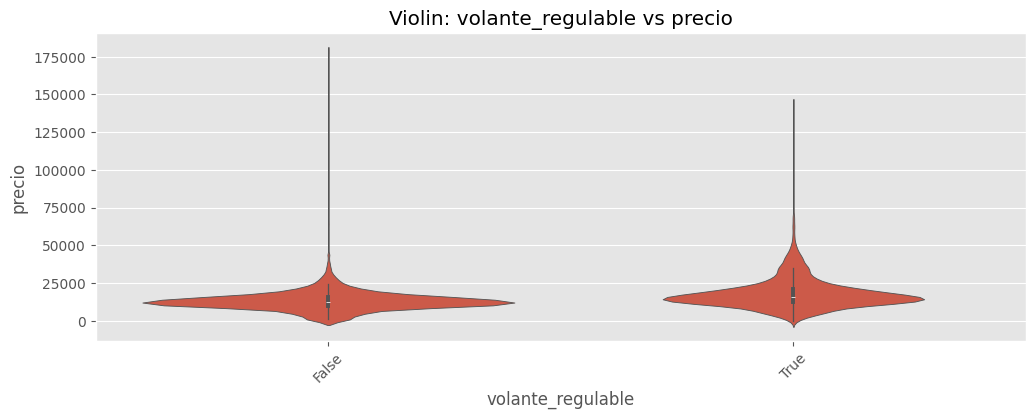

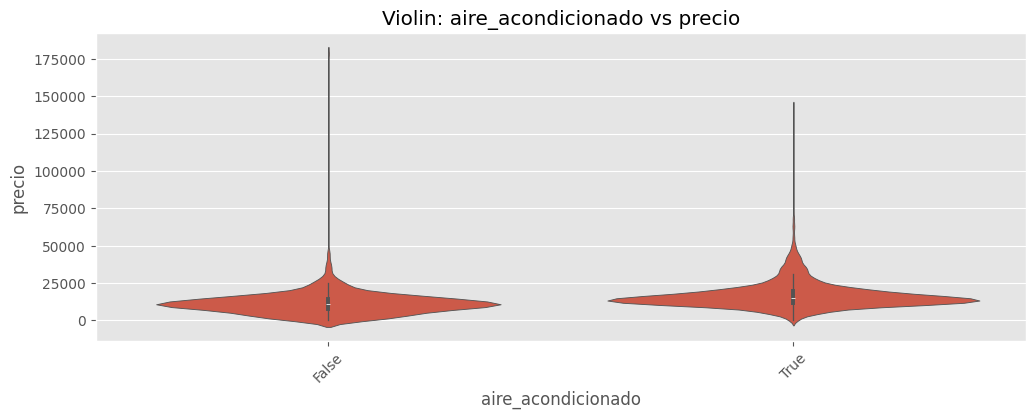

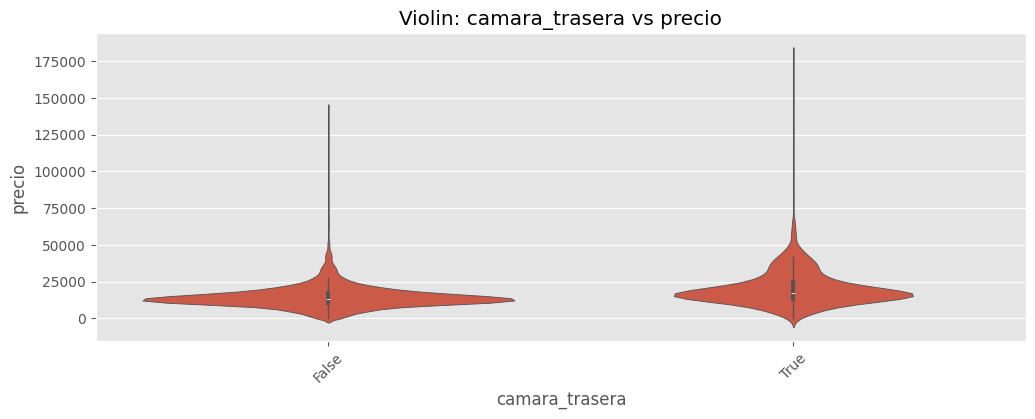

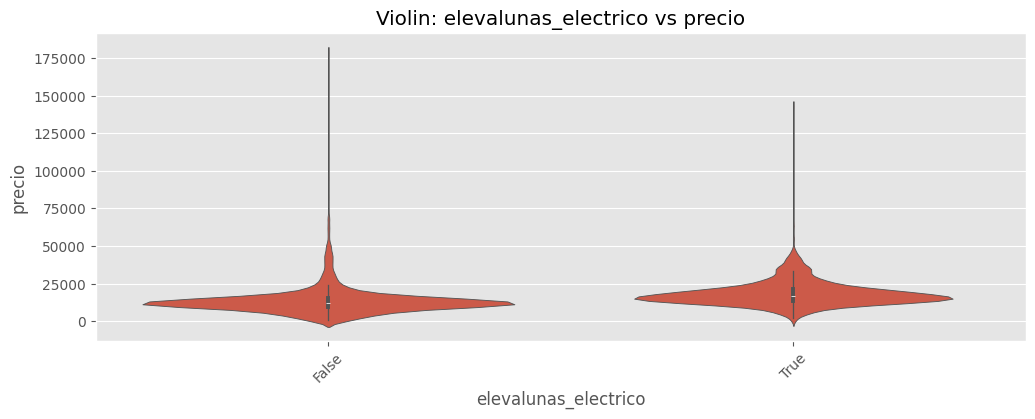

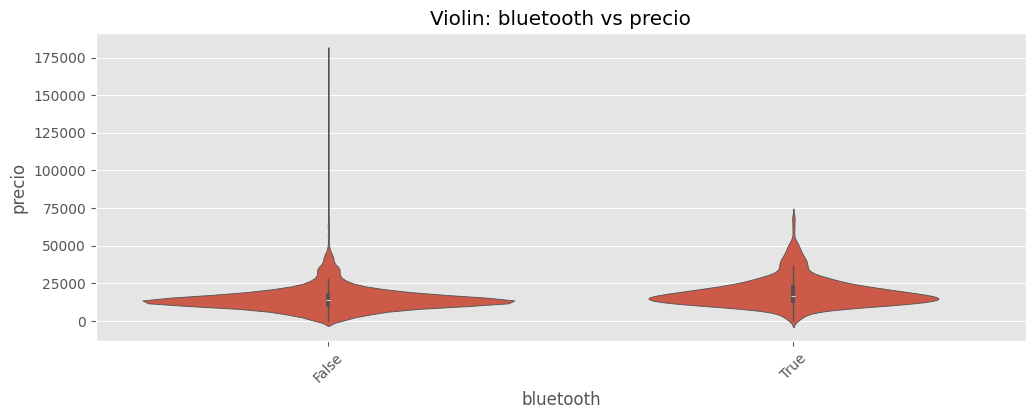

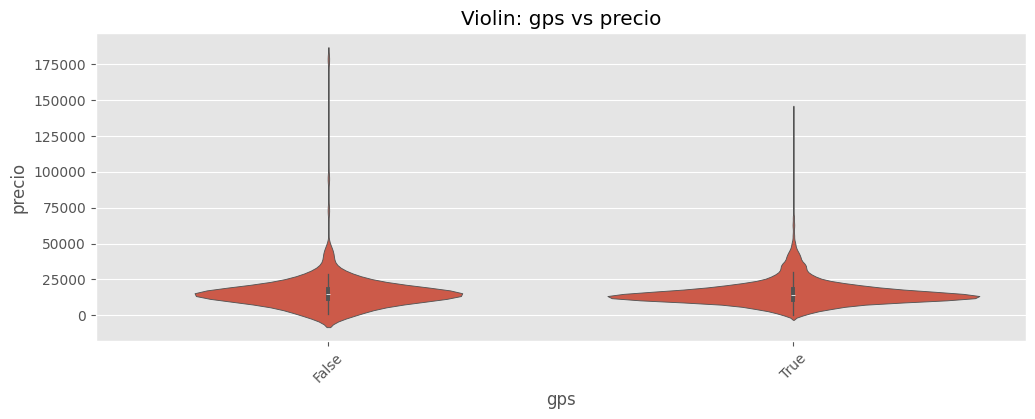

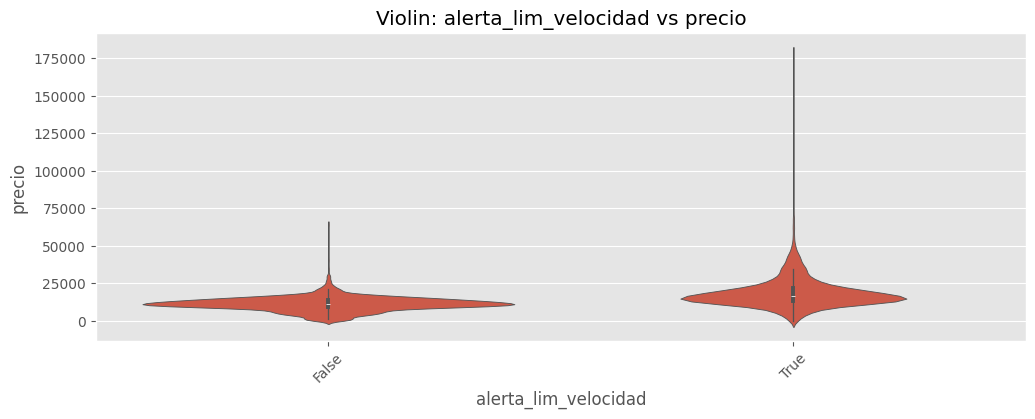

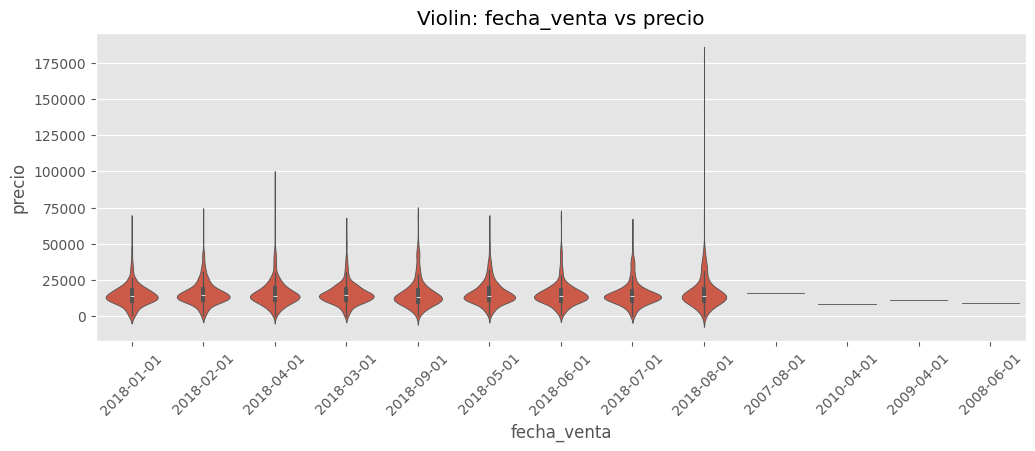

In [63]:
for col in cat_cols:
    if df_bmw[col].nunique() <= 20:  # solo categorías manejables
        plt.figure(figsize=(12,4))
        sns.violinplot(x=col, y='precio', data=df_bmw)
        plt.title(f'Violin: {col} vs precio')
        plt.xticks(rotation=45)
        plt.show()

## Variables numéricas vs target

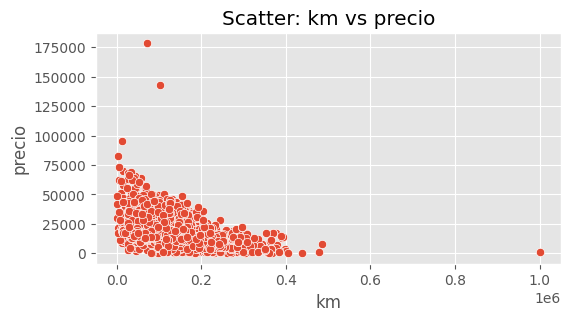

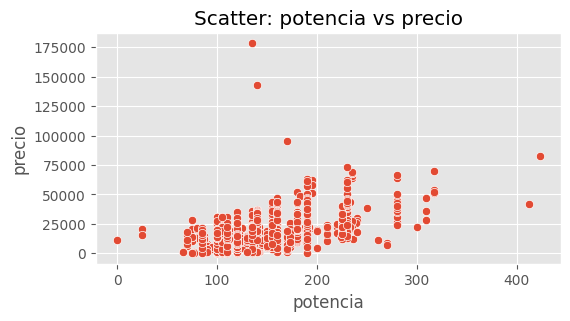

In [64]:
for col in num_cols:
    if col != 'PRECIO':
        plt.figure(figsize=(6,3))
        sns.scatterplot(x=df_bmw[col], y=df_bmw['precio'])
        plt.title(f'Scatter: {col} vs precio')
        plt.show()

## Pregunta 6

In [ ]:
#Transformar variables categoricas a numericas, fecha_venta
df_bmw["fecha_venta"] = pd.to_datetime(df_bmw["fecha_venta"])